# **Campo eléctrico**

1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio
elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

- a. Encontrar el campo en un punto producido por dos cargas q1 y q2
- b. Emplee el comando  plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
- c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Condiciones iniciales

xp=0
yp=5

xl=3
yl=0

x2=-3
y2=0

q0=3e-6 # Carga en Coulombs
q1=3e-6

k=(8.99)*10**9

In [3]:
# Función que calcula las coordenadas Ex,Ey del campo eléctrico producido por una partícula en un punto P

def campo_electrico (xl,yl,q0, xp,yp):

  v_x= xp-xl
  v_y=yp-yl
  r= np.sqrt((xp-xl)**2+(yp-yl)**2)**2
  r_x= v_x/r
  r_y=v_y/r
  E_x= (k*(q0)/r**2)*r_x
  E_y= (k*(q0)/r**2)*r_y
  Ef=np.array((E_x,E_y))
  return(Ef)

E1= campo_electrico (xl, yl, q0, xp,yp) # Devuelve las componentes (x,y) del campo E1
E2= campo_electrico (x2, y2, q1, xp, yp)
Ef= E1+E2

In [4]:
# Campo eléctrico en cada punto del espacio

x = np.linspace(-6,6,20) # Funciona con linspace
y = np.linspace(-6,6,20)
X,Y= np.meshgrid(x,y)

In [5]:
def campo_totalX(X,Y,q0,xl,yl):

  R = np.sqrt((X - xl)**2 + (Y - yl)**2)  # Distancia desde la carga
  Ex = k * q0 * (X - xl) / R**3  # Componente x del campo eléctrico
  return(Ex)

In [6]:
def campo_totalY(X,Y,q1,x2,y2):

  R = np.sqrt((X - x2)**2 + (Y - y2)**2)  # Distancia desde la carga
  Ey = k * q0 * (Y - y2) / R**3  # Componente y del campo eléctrico
  return(Ey)

In [7]:
EX= campo_totalX(X,Y,q0,xl,yl)+ campo_totalX(X,Y,q1,x2,y2)
EY= campo_totalY(X,Y,q0,xl,yl)+ campo_totalY(X,Y,q1,x2,y2)

In [8]:
# Dirección de los vectores en cada punto del espacio

angulo = np.arctan2(EY, EX)

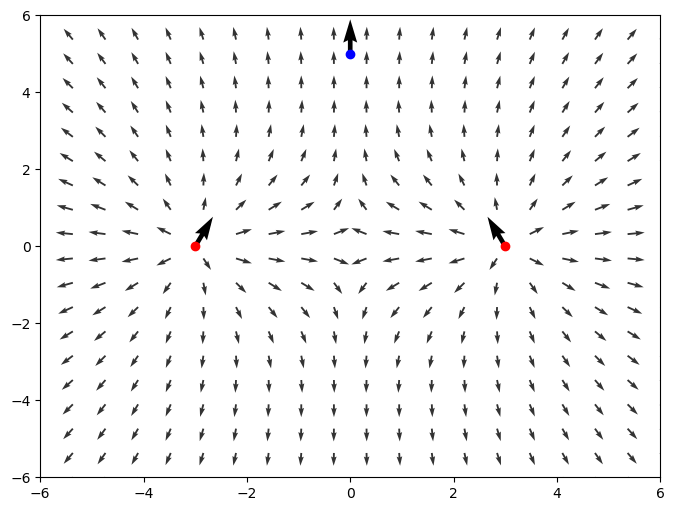

In [9]:
# Gráfica

plt.figure(figsize=(8, 6))
plt.plot(xp,yp,"bo")
plt.plot(xl,yl,"ro")
plt.plot(x2,y2,"ro")



plt.quiver(xp, yp,Ef[0],Ef[1])
plt.quiver(xl, yl,E1[0],E1[1])
plt.quiver(x2, y2,E2[0],E2[1])
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.quiver(X, Y, np.cos(angulo), np.sin(angulo), angles='xy', scale_units='xy', scale=3, color="black", headlength=5, alpha=0.8)
plt.show()